In [1]:
#this demo will show how to find the color cards

from zumi.util.camera import Camera
import PIL.Image
import cv2
import IPython.display
import time

#we will use the smallest resolution to speed things up
width = 80
height = 60
multiple = 2
fps = 30.0


blueLower = (20, 70, 70)
blueUpper = (40, 200, 200)
blue = [blueLower,blueUpper]

greenLower = (40, 70, 70)
greenUpper = (70, 200, 200)
green = [greenLower,greenUpper]

yellowLower = (90, 150, 120)
yellowUpper = (100, 255, 255)
yellow = [yellowLower,yellowUpper]

orangeLower = (100, 150, 120)
orangeUpper = (110, 255, 255)
orange = [orangeLower,orangeUpper]

redLower = (110, 100, 100)
redUpper = (130, 255, 255)
red = [redLower,redUpper]

purpleLower = (140, 30, 60)
purpleUpper = (170, 255, 255)
purple = [purpleLower,purpleUpper]


camera = Camera(width,height)
camera.start_camera()

def track_this_hue(image,color):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    filteredFrame = cv2.inRange(hsv, color[0], color[1])
    colorCutout =  cv2.bitwise_and(image, image, mask=filteredFrame)

    return colorCutout

try:
    # record video
    for i in range(200):#take 200 frames
        time_start = time.time()
        image = camera.capture()
        
        #------------------------
        colorCutout = track_this_hue(image,green)
        #------------------------
        
        resized = cv2.resize(colorCutout, (width*multiple, height*multiple))
        IPython.display.display(PIL.Image.fromarray(resized))
        IPython.display.clear_output(wait=True)
finally:
    time.sleep(1)
    camera.close()
    print("done")    

Closing PiCamera
done


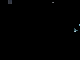

hue,  18
Closing PiCamera
done


KeyboardInterrupt: 

In [5]:
#this program will try to go through all the colors
hue = 10
multiple = 1
camera = Camera(width,height)
camera.start_camera()

def track_this_hue(image,color):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    filteredFrame = cv2.inRange(hsv, color[0], color[1])
    colorCutout =  cv2.bitwise_and(image, image, mask=filteredFrame)

    return colorCutout

try:
    # record video
    for i in range(200):#take 200 frames
        #change the hue value
        hue= hue+1
        if hue >170:#hue value cant go above 180 so we stop at 170
            hue = 10
        lower = (hue-10, 0, 50)
        upper = (hue+10, 130, 230)
        varying_color = [lower,upper]
        
        time_start = time.time()
        image = camera.capture()
        colorCutout = track_this_hue(image,varying_color)
        resized = cv2.resize(colorCutout, (width*multiple, height*multiple))
        IPython.display.display(PIL.Image.fromarray(resized))
        print("hue, ",hue)
        IPython.display.clear_output(wait=True)
finally:
    time.sleep(1)
    camera.close()
    print("done")
    